In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
features = df.columns[:-1]
x = df.loc[:, features].values
y = df.loc[:,[df.columns[-1]]].values

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2', 'PCA 3'])

In [6]:
finalDf = pd.concat([principalDf, df[[df.columns[-1]]]], axis = 1)

In [7]:
x_vals = finalDf['PCA 1']
y_vals = finalDf['PCA 2']
z_vals = finalDf['PCA 3']

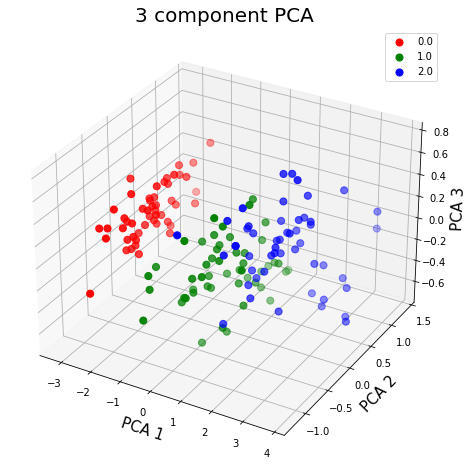

In [8]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
ax.set_zlabel('PCA 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = df[df.columns[-1]].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[df.columns[-1]] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA 1']
               , finalDf.loc[indicesToKeep, 'PCA 2']
               , finalDf.loc[indicesToKeep, 'PCA 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()